In [2]:
import os
import numpy as np
import dill
import json
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from pprint import pprint

# Ant

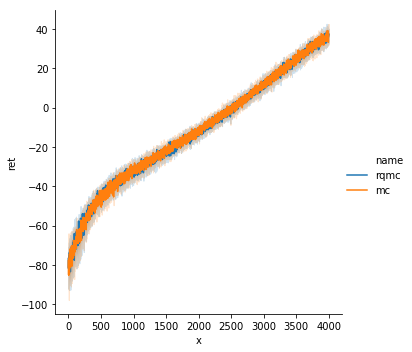

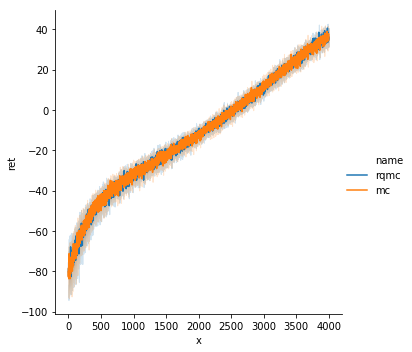

In [20]:
exp_name = 'search_vpg_ant_trajs'
input_dir = Path('data', exp_name)
output_dir = Path('data/plots', exp_name)
output_dir.mkdir(parents=True, exist_ok=True)

N = 4000

for fn in input_dir.iterdir():
    if fn.is_dir(): continue
    with open(fn, 'rb') as f:
        results = dill.load(f)
        data = pd.concat([
            pd.concat([
                pd.DataFrame({
                    'name': name,
                    'ret': val[:N],
                    'x': np.arange(len(val))[:N]
                })
                for name, val in res.items()
            ])
            for res in results
        ])
        plot = sns.relplot(x='x', y='ret', kind='line', hue='name', data=data)
        plt.savefig(Path(output_dir, '{}.png'.format(fn.name)))

In [ ]:
exp_name = 'search_vpg_trajs_32'
input_dir = Path('data', exp_name)
output_dir = Path('data/plots', exp_name)
output_dir.mkdir(parents=True, exist_ok=True)

N = 4000

for fn in input_dir.iterdir():
    with open(fn, 'rb') as f:
        results = dill.load(f)
        data = pd.concat([
            pd.concat([
                pd.DataFrame({
                    'name': name,
                    'ret': val[:N],
                    'x': np.arange(len(val))[:N]
                })
                for name, val in res.items()
            ])
            for res in results
        ])
        plot = sns.relplot(x='x', y='ret', kind='line', hue='name', data=data)
        plt.savefig(Path(output_dir, '{}.png'.format(fn.name)))

# Compare Learning

ploting log/learn_lqr_gt/H_20-lr_0.0001
ploting log/learn_lqr_gt/H_10-lr_0.0005
ploting log/learn_lqr_gt/H_10-lr_0.001
ploting log/learn_lqr_gt/H_20-lr_5e-05
ploting log/learn_lqr_gt/H_10-lr_5e-05
ploting log/learn_lqr_gt/H_10-lr_0.0001
ploting log/learn_lqr_gt/H_20-lr_0.0005
ploting log/learn_lqr_gt/H_20-lr_0.001


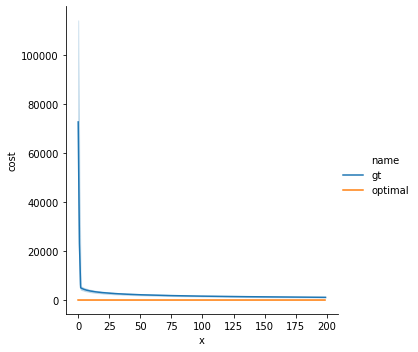

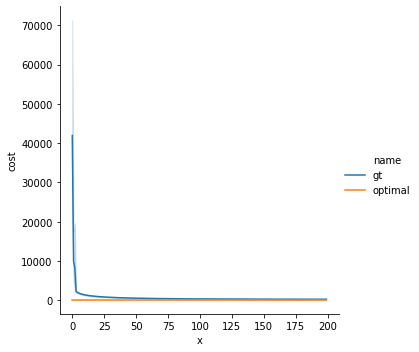

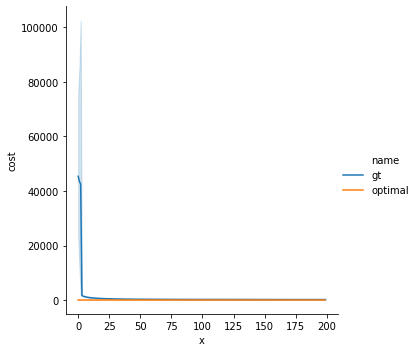

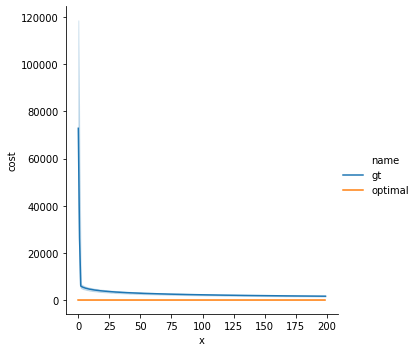

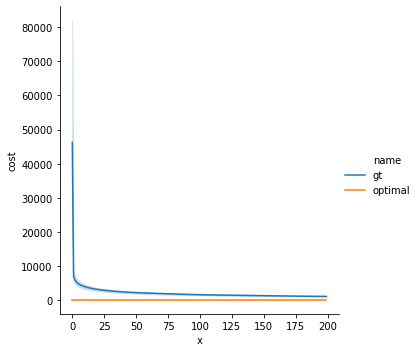

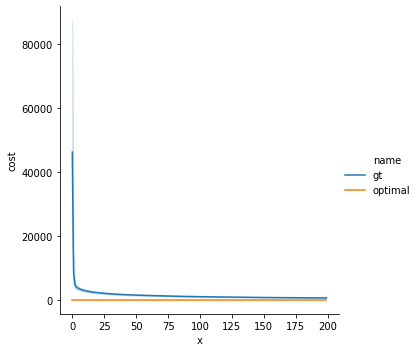

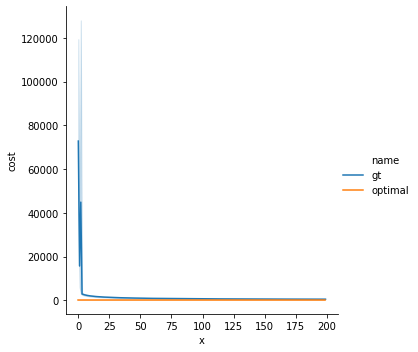

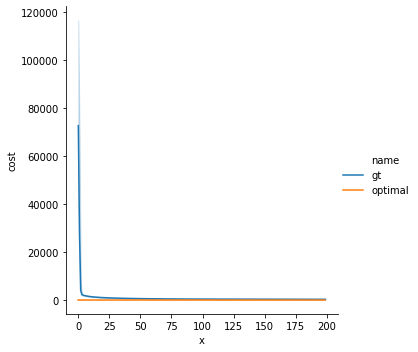

In [3]:
replace_duplicate = False
mc_discard_threshold = 1
#exp_name = 'compare_on_cartpole'
#exp_name = 'search_arqmc_linear'
#exp_name = 'compare_on_swimmer'
#exp_name = 'search_learn_on_pointmass'
exp_name = 'learn_lqr_gt'
input_dir = Path('log', exp_name)
output_dir = Path('data/plots', exp_name)
output_dir.mkdir(parents=True, exist_ok=True)
for fn in input_dir.iterdir():
    save_path = Path(output_dir, '{}.png'.format(fn.name))
    if not replace_duplicate and save_path.exists():
        print('{} exists, skip'.format(save_path))
        continue
    with open(fn, 'rb') as f:
        print('ploting {}'.format(fn))
        full_results = dill.load(f)
        #results = [res for res, info in full_results if len(info['out']) == 0]
        #if len(results) < mc_discard_threshold:
        #    results = [res for res, info in full_results if len(info['out']) == 1]
        results = [res for res, info in full_results if len(info['out']) <= 1]
        if len(results) == 0: continue
        data = pd.concat([
            pd.concat([
                pd.DataFrame({
                    'name': name,
                    'cost': -val,
                    'x': np.arange(len(val)),
                })
                for name, val in res.items() if name not in ['mc']
            ])
            for res in results
        ])
        plot = sns.relplot(x='x', y='cost', kind='line', hue='name', data=data)
        plt.savefig(save_path)

In [ ]:
def merge_plot(fns, save_path):
    data = pd.DataFrame()
    for i, fn in enumerate(fns):
        with open(fn, 'rb') as f:
            print('loading {}'.format(fn))
            full_results = dill.load(f)
            results = [res for res, info in full_results if len(info['out']) == 0]
            if len(results) < mc_discard_threshold:
                print('discard mc')
                results = [res for res, info in full_results if len(info['out']) == 1]
            if len(results) == 0:
                print('no valid result after discarding mc')
                continue
            data = pd.concat([
                data,
                pd.concat([
                    pd.concat([
                        pd.DataFrame({
                            'name': '{}_{}'.format(name, i),
                            'cost': -val,
                            'x': np.arange(len(val)),
                        })
                        for name, val in res.items()
                    ])
                    for res in results
                ]),
            ])
    plot = sns.relplot(x='x', y='cost', kind='line', hue='name', data=data)
    plt.savefig(save_path)

merge_plot(['log/compare_on_swimmer/H_150-traj_64', 'log/compare_on_swimmer/H_150-traj_64_snorm'], 'data/plots/compare_on_swimmer/merge')

loading log/compare_on_swimmer/H_150-traj_64
loading log/compare_on_swimmer/H_150-traj_64_snorm


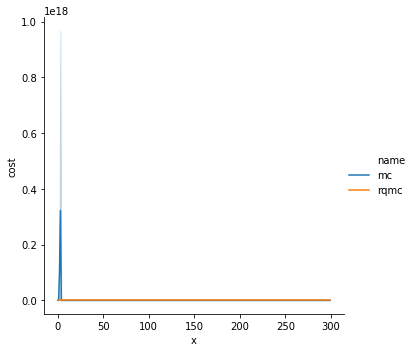

In [21]:
#with open('data/search_network/200-0.0005-15-5.0', 'rb') as f:
with open('data/search_arqmc_linear/traj_128-lr_0.0001-H_10-init_3.0', 'rb') as f:
    full_results = dill.load(f)
    print('num of results:', len(full_results))
    print('num of outs:')
    print('mc:', len([res for res, info in full_results if 'mc' in info['out']]))
    print('rqmc:', len([res for res, info in full_results if 'rqmc' in info['out']]))
    print('arqmc:', len([res for res, info in full_results if 'arqmc' in info['out']]))
    print('optimal:', len([res for res, info in full_results if 'optimal' in info['out']]))
    results = [res for res, info in full_results if len(info['out']) == 0]
    print('number of learning results:', len(results))
    if len(results) < 5: # if not enough learning results, count the number of them that only mc is out
        results = [res for res, info in full_results if len(info['out']) == 1]
        print('number of learning results:', len(results))


# data = pd.concat([
#     pd.concat([
#         pd.DataFrame({
#             'name': name,
#             'cost': -val,
#             'x': np.arange(len(val))
#         })
#         for name, val in res.items() if name != 'optimal'
#     ])
#     for res in results
# ])

# #data = pd.concat([mc_data, rqmc_data, full_data, optimal_data])
# plot = sns.relplot(x='x', y='cost', kind='line', hue='name', data=data)
# plot.set(ylim=(0, 400))

# Compare Gradident

In [121]:
# load data
def plot_grad_dir(input_dir, output_dir, replace_duplicate=False):
    output_dir.mkdir(parents=True, exist_ok=True)
    for fn in input_dir.iterdir():
        output_fn = Path(output_dir, '{}.png'.format(fn.name))
        if not replace_duplicate and output_fn.exists():
            print('{} exists, skip'.format(output_fn))
            continue
        else:
            print('ploting {}'.format(fn))
            plot_grad(fn, output_fn)
    
def plot_grad(fn, output_fn):
    with open(fn, 'rb') as f:
        results = dill.load(f)
        print(len(results))
    mc_data = pd.concat([
        pd.DataFrame(
            {'name': 'mc',
             'error': results[i][0],
             'x': np.arange(len(results[i][0]))}) for i in range(len(results))
    ])

    rqmc_data = pd.concat([
        pd.DataFrame(
            {'name': 'rqmc',
             'error': results[i][1],
             'x': np.arange(len(results[i][1]))}) for i in range(len(results))
    ])

    arqmc_data = pd.concat([
        pd.concat([
            pd.DataFrame(
                {'name': name,
                 'error': error,
                 'x': np.arange(len(error))}) 
            for name, error in res[2].items()
        ])
        for res in results
    ])
    data = pd.concat([mc_data, rqmc_data, arqmc_data])
    plot = sns.relplot(x='x', y='error', kind='line', hue='name', data=data)
    plot.set(yscale='log')
    plt.savefig(output_fn)

def cosine_similarity(a, b):
    a, b = a.flatten(), b.flatten()
    return np.dot(a, b) / np.linalg.norm(a) / np.linalg.norm(b)
    
def plot_grad_cosine_similarity(fn, output_fn):
    with open(fn, 'rb') as f:
        results = dill.load(f)
        print(len(results))
    data = pd.concat([
        pd.concat([
            pd.DataFrame({
                'name': name,
                'cs': [cosine_similarity(grad, res[-1]['expected_grad']) for grad in res[-1]['means'][name]],
                'x': np.arange(len(res[-1]['means'][name])),
            })
            for res in results
        ])
        for name in results[0][-1]['means']
    ])
    plot = sns.relplot(x='x', y='cs', kind='line', hue='name', data=data)
    plot.set(yscale='log')  
    if output_fn is not None:
        plt.savefig(output_fn)    

def plot_grad_cosine_similarity_dir(input_dir, output_dir, replace_duplicate=False):
    output_dir.mkdir(parents=True, exist_ok=True)
    for fn in input_dir.iterdir():
        output_fn = Path(output_dir, '{}_cs.png'.format(fn.name))
        if not replace_duplicate and output_fn.exists():
            print('{} exists, skip'.format(output_fn))
            continue
        else:
            print('ploting {}'.format(fn))
            plot_grad_cosine_similarity(fn, output_fn)

def plot_grad_norm(fn, output_fn=None):
    with open(fn, 'rb') as f:
        results = dill.load(f)
        print(len(results))
    data = pd.concat([
        pd.concat([
            pd.DataFrame({
                'name': name,
                'norm': [np.linalg.norm(grad - res[-1]['expected_grad']) for grad in res[-1]['means'][name]],
                'x': np.arange(len(res[-1]['means'][name])),
            })
            for res in results
        ])
        for name in results[0][-1]['means']
    ])
    plot = sns.relplot(x='x', y='norm', kind='line', hue='name', data=data)
    plot.set(yscale='log')
    if output_fn is not None:
        plt.savefig(output_fn)
    
def plot_grad_norm_dir(input_dir, output_dir, replace_duplicate=False):
    output_dir.mkdir(parents=True, exist_ok=True)
    for fn in input_dir.iterdir():
        output_fn = Path(output_dir, '{}_norm.png'.format(fn.name))
        if not replace_duplicate and output_fn.exists():
            print('{} exists, skip'.format(output_fn))
            continue
        else:
            print('ploting {}'.format(fn))
            plot_grad_norm(fn, output_fn)    
    
def table_grad(fn):
    with open(fn, 'rb') as f:
        results = dill.load(f)
        print(len(results))
    mc_errors = [res[0][-1] for res in results if len(res[0]) > 1]
    print('mc: {}({})'.format(np.mean(mc_errors), np.std(mc_errors)))
    rqmc_errors = [res[1][-1] for res in results if len(res[0]) > 1]
    print('rqmc: {}({})'.format(np.mean(rqmc_errors), np.std(rqmc_errors)))
    for sorter in results[0][2].keys():
        arqmc_errors = [res[2][sorter][-1] for res in results if len(res[0]) > 1]
        print('arqmc ({}): {}({})'.format(sorter, np.mean(arqmc_errors), np.std(arqmc_errors)))
        
def table_grad_dir(input_dir):
    for fn in input_dir.iterdir():
        print('showing {}'.format(fn))
        table_grad(fn)
        
def table_grad_cs(fn):
    with open(fn, 'rb') as f:
        results = dill.load(f)
        print(len(results))
    results = [res for res in results if len(res[-1]['out']) == 0]
    mc_cs = [cosine_similarity(res[-1]['means']['mc'][-1], res[-1]['expected_grad']) for res in results]
    print('mc: {}({})'.format(np.mean(mc_cs), np.std(mc_cs)))
    rqmc_cs = [cosine_similarity(res[-1]['means']['rqmc'][-1], res[-1]['expected_grad']) for res in results]
    print('rqmc: {}({})'.format(np.mean(rqmc_cs), np.std(rqmc_cs)))
    for sorter in results[0][2].keys():
        arqmc_cs = [cosine_similarity(res[-1]['means'][sorter][-1], res[-1]['expected_grad']) for res in results]
        print('arqmc ({}): {}({})'.format(sorter, np.mean(arqmc_cs), np.std(arqmc_cs)))
        
def table_grad_cs_dir(input_dir):
    for fn in input_dir.iterdir():
        print('showing {}'.format(fn))
        table_grad_cs(fn)    

In [111]:
#plot_grad_norm('log/compare_grad_on_lqr/H_10-T1024')
#plot_grad_cosine_similarity('log/compare_grad_on_lqr/H_10-T1024')

plot_grad_norm_dir('')

TypeError: plot_grad_norm_dir() missing 1 required positional argument: 'output_dir'

In [122]:
exp_name = 'compare_grad_on_lqr'
input_dir = Path('log', exp_name)
output_dir = Path('data/plots', exp_name)

#table_grad_dir(input_dir)
#table_grad(Path(input_dir, 'H_10-T1024'))
#plot_grad_norm_dir(input_dir, output_dir)
#plot_grad_cosine_similarity_dir(input_dir, output_dir)
table_grad_cs_dir(input_dir)

showing log/compare_grad_on_lqr/H_10-T1024
36
mc: 0.9062882578985868(0.19445527979554497)
rqmc: 0.9765298808214169(0.03797915283122863)
arqmc (value): 0.9854402227658395(0.018927888946519277)
arqmc (policy): 0.9850955055953002(0.023522759231667766)
arqmc (norm): 0.9758009742787854(0.07692740077789109)
arqmc (group): 0.9820802747398206(0.01349291658642952)
arqmc (permute): 0.9649708020503163(0.0520165486550394)
showing log/compare_grad_on_lqr/H_40-T64
50
mc: 0.5626460148026355(0.305383625780519)
rqmc: 0.5708659584958035(0.2492266636545181)
arqmc (value): 0.7456533361620863(0.17064603682835772)
arqmc (policy): 0.6532701322802172(0.2796423534155056)
arqmc (norm): 0.6569156614365503(0.22238061963243552)
arqmc (group): 0.5889455249804787(0.27250339600076945)
arqmc (permute): 0.6706600595863255(0.19120945899492545)
showing log/compare_grad_on_lqr/H_40-T256
50
mc: 0.804047302641982(0.13389858450077352)
rqmc: 0.832157847831534(0.1324574725155035)
arqmc (value): 0.868744507002879(0.113533936681

In [58]:
with open(Path('log', 'compare_grad_on_lqr', 'H_10-T1024'), 'rb') as f:
    results = dill.load(f)
    print(len(results)) 
for res in results:
    print(len(res[0]), res[0][-1])

30
1024 109.53177498395755
1024 86.242154290737
1024 8002.428819025573
1024 1036253591.0128942
1024 138.74861858848035
1024 3436844620.929505
1024 716708.9352001102
1024 102.67196219927622
1024 229695.4214223799
1024 69.42201289568993
1024 1371045051.4638188
1024 4023.5233181401004
1024 103941933.91761479
1024 214758.88932490256
1024 10.927578092814722
1024 32.8192439346095
1024 2268193.766759807
1024 626996732289.3138
1024 2123528076.7005672
1024 1493.6056491732386
1024 2645051.9479644774
1024 353.6384915729192
1024 4173888.033639733
1024 406.3621078935918
1024 1051.7821292226786
1024 21782790355213.766
1024 56420.96377059607
1024 28.82988870284332
1024 116030.6875461271
1024 1366.7196234092419


# Comparing over seeds (Return)

In [22]:
# load data
def plot_return_dir(input_dir, output_dir, replace_duplicate=False):
    output_dir.mkdir(parents=True, exist_ok=True)
    for fn in input_dir.iterdir():
        output_fn = Path(output_dir, '{}.png'.format(fn.name))
        if not replace_duplicate and output_fn.exists():
            print('{} exists, skip'.format(output_fn))
            continue
        else:
            print('ploting {}'.format(fn))
            plot_return(fn, output_fn)
    
def plot_return(fn, output_fn):
    with open(fn, 'rb') as f:
        results = dill.load(f)
        print(len(results))
    mc_data = pd.concat([
        pd.DataFrame(
            {'name': 'mc',
             'error': results[i][0],
             'x': np.arange(len(results[i][0]))}) for i in range(len(results))
    ])

    rqmc_data = pd.concat([
        pd.DataFrame(
            {'name': 'rqmc',
             'error': results[i][1],
             'x': np.arange(len(results[i][1]))}) for i in range(len(results))
    ])

    arqmc_data = pd.concat([
        pd.concat([
            pd.DataFrame(
                {'name': name,
                 'error': error,
                 'x': np.arange(len(error))}) 
            for name, error in res[2].items()
        ])
        for res in results
    ])
    data = pd.concat([mc_data, rqmc_data, arqmc_data])
    plot = sns.relplot(x='x', y='error', kind='line', hue='name', data=data)
    plot.set(yscale='log')
    plt.savefig(output_fn)
        

ploting log/compare_arqmc_sorter_on_cost/20_12-10-1.0
100
ploting log/compare_arqmc_sorter_on_cost/20_12-10-3.0
100
ploting log/compare_arqmc_sorter_on_cost/20_12-10-5.0
100
ploting log/compare_arqmc_sorter_on_cost/20_12-20-1.0
100
ploting log/compare_arqmc_sorter_on_cost/20_12-20-3.0
100
ploting log/compare_arqmc_sorter_on_cost/20_12-20-5.0
100
ploting log/compare_arqmc_sorter_on_cost/20_12-5-1.0
100
ploting log/compare_arqmc_sorter_on_cost/20_12-5-3.0
100
ploting log/compare_arqmc_sorter_on_cost/20_12-5-5.0
100


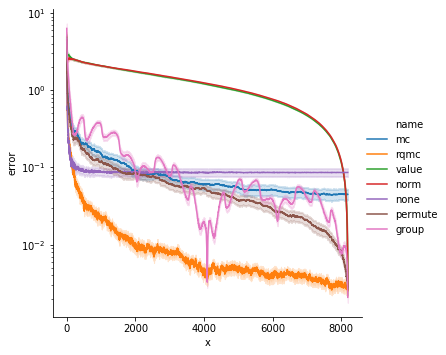

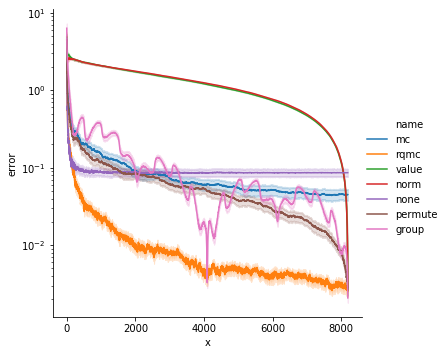

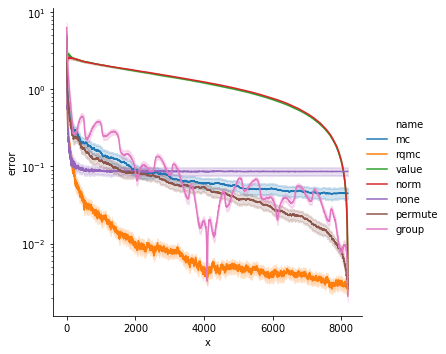

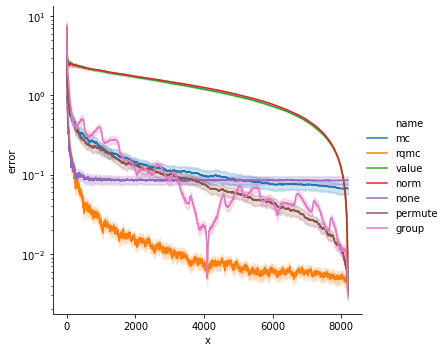

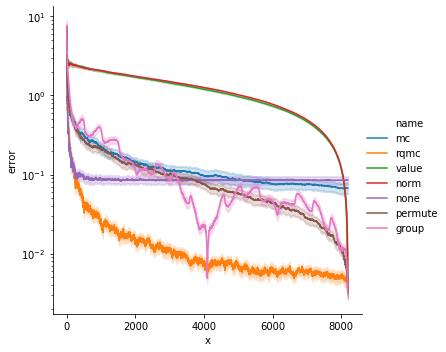

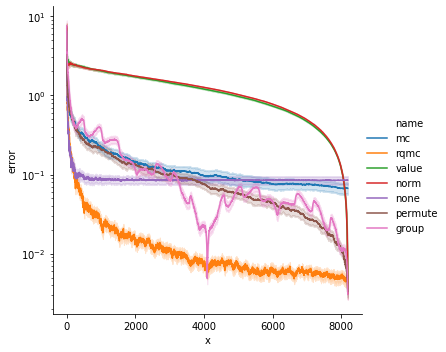

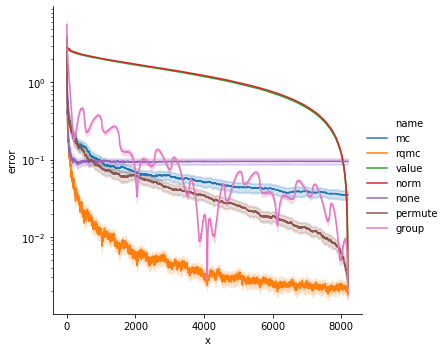

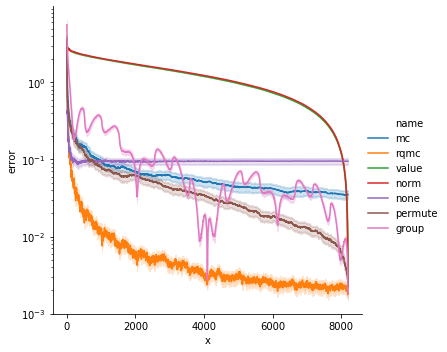

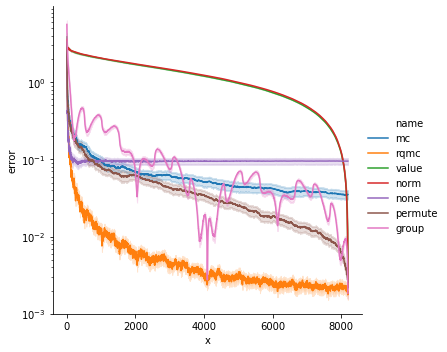

In [24]:
exp_name = 'compare_arqmc_sorter_on_cost'
input_dir = Path('log', exp_name)
output_dir = Path('data/plots', exp_name)

plot_return_dir(input_dir, output_dir)

# One seed

In [4]:
#with open('one_seed/H-1.num_traj-2500.0.pkl', 'rb') as f:
#with open('one_seed/compare_0_100k.pkl', 'rb') as f:
with open('one_seed/H-5.num_traj-30000.1.pkl', 'rb') as f:
    results = dill.load(f)

mc_data = pd.DataFrame({
    'name': 'mc',
    'error': results['mc_errors'],
    'x': np.arange(len(results['mc_errors']))
})
rqmc_data = pd.DataFrame({
    'name': 'rqmc',
    'error': results['rqmc_errors'],
    'x': np.arange(len(results['rqmc_errors']))
})
data = pd.concat([mc_data, rqmc_data])

# Debug

In [11]:
import torch
from torch.optim import SGD

model = torch.nn.Linear(10, 10)
optimizer = SGD(filter(lambda p: p.requires_grad, model.parameters()), lr=1e-3)

model.bias.requires_grad = False

for name, param in model.named_parameters():
    print(name, param)

x = torch.randn(5, 10)
g = torch.randn(5, 10)

loss = torch.nn.functional.mse_loss(x, g)

optimizer.zero_grad()
loss.backward()
optimizer.step()

for name, param in model.named_parameters():
    print(name, param)

weight Parameter containing:
tensor([[-0.1934, -0.2758, -0.1425, -0.1616, -0.3068, -0.0743,  0.2823,  0.1410,
          0.0495,  0.2070],
        [ 0.1081, -0.0497, -0.0402,  0.1652, -0.1893, -0.0879,  0.1987, -0.0668,
          0.0091,  0.2850],
        [-0.0523, -0.0862,  0.1250, -0.2178,  0.0176,  0.2996,  0.0648,  0.0271,
          0.0990, -0.1839],
        [ 0.1761, -0.2515,  0.2376,  0.0828, -0.0556,  0.2213,  0.2378,  0.2849,
          0.1870, -0.0220],
        [ 0.1420, -0.2498,  0.1630,  0.0941,  0.2684,  0.1991, -0.1635,  0.1753,
          0.2791,  0.1415],
        [ 0.0059, -0.2648,  0.2324,  0.0913, -0.0097,  0.0066,  0.0373,  0.0405,
         -0.1373, -0.0539],
        [ 0.2882,  0.0784,  0.0264, -0.1116,  0.2229, -0.1447, -0.1129, -0.0699,
          0.2869,  0.0132],
        [-0.2146,  0.1866, -0.1010,  0.0016, -0.1902, -0.0917, -0.1621,  0.0455,
          0.2752, -0.0336],
        [ 0.2609, -0.3011,  0.3098, -0.0103,  0.0185,  0.1859, -0.2402, -0.2952,
         -0.1301, 

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn